In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable

In [4]:
df = pd.read_csv('utilizar_copia.csv', index_col=0)
df.head(3)

,case_number,year,type,country,area,location,activity,name,age,time,species_,injury,fecha_limpia,fatal_clean,sexo
0,1800.00.00,1800,Unprovoked,seychelles,St. Anne,NaN,a corsair's boat was overturned,NaN,NaN,NaN,NaN,"FATAL, all onboard were killed by sharks",NaN,Y,F
1,1797.05.28.R,1797,Unprovoked,NaN,NaN,NaN,Dropped overboard,child,NaN,NaN,NaN,FATAL,May,Y,NaN
2,1792.09.12,1792,Provoked,england,NaN,On the Thames River,Fishing,male,NaN,NaN,NaN,"FATAL, PROVOKED INCIDENT",Sep,Y,M


1. Establecer el tamaño de las figuras

In [22]:
plt.rcParams["figure.figsize"] = (15,10)

2. Contestad las preguntas

- ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

In [8]:
df['country'].unique()

array(['seychelles', nan, 'england', 'australia', 'barbados', 'jamaica',
       'martinique', 'usa', 'guinea', 'greenland', 'france', 'spain',
       'mediterranean sea', 'cuba', 'sweden', 'panama', 'italy',
       'iceland', 'roatan', 'india', 'between portugal & india',
       'venezuela', 'mexico', 'greece', 'canada', 'kenya', 'uruguay',
       'papua new guinea', 'bermuda', 'lebanon', 'sudan', 'djibouti',
       'libya', 'new zealand', 'vietnam', 'sri lanka', 'mozambique',
       'south africa', 'bahrein', 'bahamas', 'reunion', 'solomon islands',
       'korea', 'french polynesia', 'vanuatu', 'iran', 'red sea?',
       'singapore', 'fiji', 'iraq', 'madagascar', 'indonesia',
       'nicaragua', 'marshall islands', 'kiribati', 'north pacific ocean',
       'saudi arabia', 'pacific ocean', 'burma', 'belize', 'asia?',
       'ceylon (sri lanka)', 'brazil', 'thailand', 'costa rica',
       'maldives', 'new caledonia', 'ecuador', 'malaysia', 'mauritius',
       'samoa', 'japan', 'egypt',

/home/adalaber/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


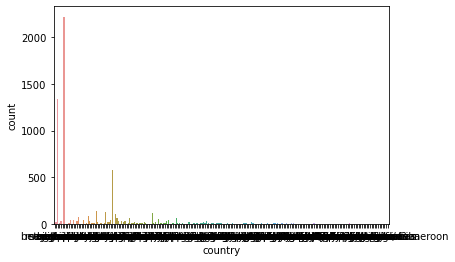

In [6]:
sns.countplot(df['country'])

Como vemos en la gráfica eligiendo todos los paises de la columna, no se ve nada claro, por lo que pasaremos a elegir los 10 paises con más ataques para representarlo.

In [42]:
df['country'].value_counts()

usa                       2222
australia                 1335
south africa               577
papua new guinea           134
new zealand                127
                          ... 
maldive islands              1
nicaragua                    1
north sea                    1
red sea / indian ocean       1
ghana                        1
Name: country, Length: 209, dtype: int64

In [17]:
df_country = df.stb.freq(['country'])
df_country

,country,count,percent,cumulative_count,cumulative_percent
0,usa,2222,35.643247,2222,35.643247
1,australia,1335,21.414822,3557,57.058069
2,south africa,577,9.255695,4134,66.313763
3,papua new guinea,134,2.149503,4268,68.463266
4,new zealand,127,2.037215,4395,70.500481
...,...,...,...,...,...
204,andaman / nicobar islandas,1,0.016041,6230,99.935836
205,algeria,1,0.016041,6231,99.951877
206,africa,1,0.016041,6232,99.967918
207,admiralty islands,1,0.016041,6233,99.983959


Vemos cuantas veces aparece cada pais.

In [27]:
df_country_10 = df_country[:11]
df_country_10

,country,count,percent,cumulative_count,cumulative_percent
0,usa,2222,35.643247,2222,35.643247
1,australia,1335,21.414822,3557,57.058069
2,south africa,577,9.255695,4134,66.313763
3,papua new guinea,134,2.149503,4268,68.463266
4,new zealand,127,2.037215,4395,70.500481
5,brazil,112,1.796599,4507,72.297081
6,bahamas,109,1.748476,4616,74.045557
7,mexico,88,1.411614,4704,75.457170
8,italy,70,1.122875,4774,76.580045
9,fiji,65,1.042669,4839,77.622714


In [28]:
df_country_10.dtypes

country                object
count                   int64
percent               float64
cumulative_count        int64
cumulative_percent    float64
dtype: object

Para quedarnos con los 10 mayores, como en esta tabla ya aparecen ordenados de mayor a menor, podemos filtrar directamente por índice.

/home/adalaber/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='country', ylabel='count'>

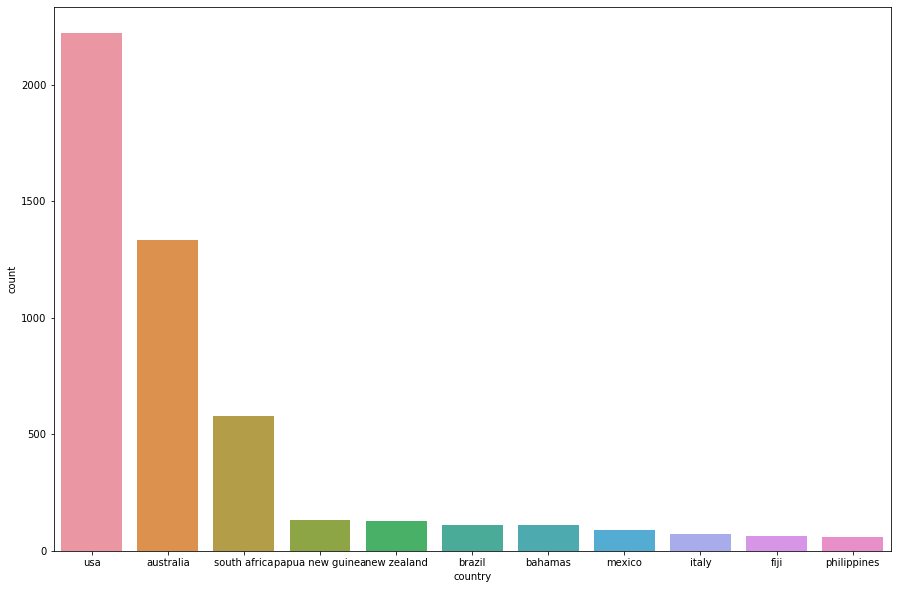

In [36]:
sns.barplot(df_country_10['country'], df_country_10['count'])

Hemos decidido usar un gráfico barplot ya que calculamos la frecuencia previamente, si no hubieramos utilizado un histograma.

/home/adalaber/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


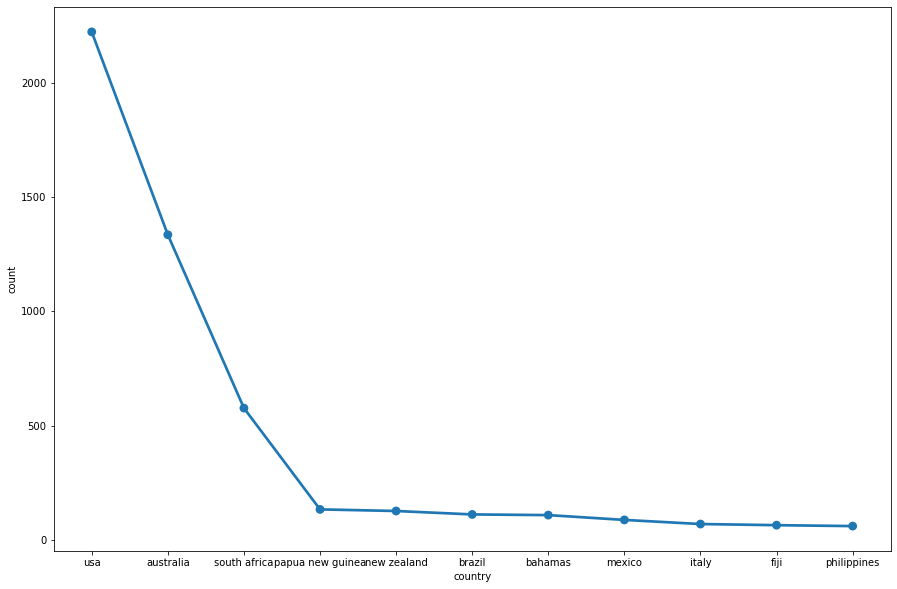

In [40]:
sns.pointplot(df_country_10['country'], df_country_10['count'])

Añadimos también este gráfico porque creemos que es interesante observar como disminuye la frecuencia por pais.

- Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

In [56]:
df_sex = pd.DataFrame(df.groupby['sexo']['country'])
df_sex

TypeError: 'method' object is not subscriptable

In [ ]:
sns.countplot(df_country_10['country'], hue= 'sexo')

- ¿Qué edad recibe mayor número de ataques? Pista: usa cut

Tambien quitar las letritas del principio de cada grafica con ;

In [63]:
#Es lo que necesitamos para el pair de limpieza


for i in df['age']:
    try:
        i.astype('int64', copy=True, errors='raise')  
    except:
        i np.nan

SyntaxError: invalid syntax (3774315420.py, line 5)

In [60]:
df['age'].describe()

count     3464
unique     157
top         17
freq       154
Name: age, dtype: object

In [ ]:
np.arange()